# Graphs for Paper

## Pt. 1: Visualizing ChIP-seq Data
We have a lot of ChIP-seq data. Let's take a look at what exactly it looks like.

In [1]:
import matplotlib.pyplot as plt
from threading import Thread
import numpy as np
import RELI as R
from RELI import RELI, LoadedData
import math
R.DEBUG = False

In [3]:
# Get list of all the locations of these ChIP-seqs + plot all this
sample = "hg19_0302"
data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

In [28]:
new_data = []
for d in data:
    for dd in d:
        new_data.append(dd)
num_bins = int(len(set(new_data)) / 100)
val = max(new_data)
new_data = new_data[:(val * val)]
new_data[:10], len(new_data), math.sqrt(len(new_data)), num_bins

([740594,
  740595,
  740596,
  740597,
  740598,
  740599,
  740600,
  740601,
  740602,
  740603],
 21673414,
 4655.4714047022135,
 204377)

In [29]:
num_overlaps = np.zeros(val)

for i in range(len(new_data)):
    num_overlaps[new_data[i] - 1] += 1

num_overlaps

array([0., 0., 0., ..., 1., 1., 1.])

In [30]:
v = int(math.sqrt(val))
num_overlaps = num_overlaps[:(v * v)]
num_overlaps = num_overlaps.reshape((v, v))

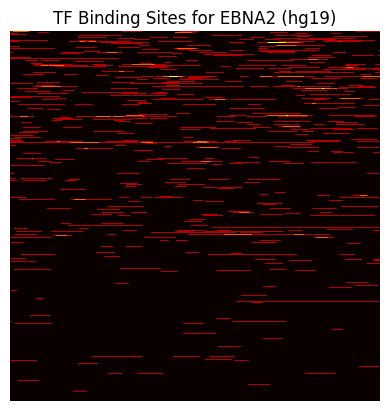

In [31]:
plt.title("TF Binding Sites for EBNA2 (hg19)")
plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
plt.axis("off")
plt.savefig("tfbs_EBNA2.png")
plt.show()

In [3]:
import os
samples = os.listdir("sample_data/ChIP-seq")
v = [line.split("\t")[3] for line in open("sample_data/ChIPseq.index").readlines()]

Analyzing sample: hg19_0001
Appending data...
Plotting...
Analyzing sample: hg19_0002
Appending data...
Plotting...
Analyzing sample: hg19_0003
Appending data...
Plotting...
Analyzing sample: hg19_0004
Appending data...
Plotting...
Analyzing sample: hg19_0005
Appending data...
Plotting...
Analyzing sample: hg19_0006
Appending data...
Plotting...
Analyzing sample: hg19_0007
Appending data...
Plotting...
Analyzing sample: hg19_0008
Appending data...
Plotting...
Analyzing sample: hg19_0009
Appending data...
Plotting...
Analyzing sample: hg19_0010
Appending data...
Plotting...


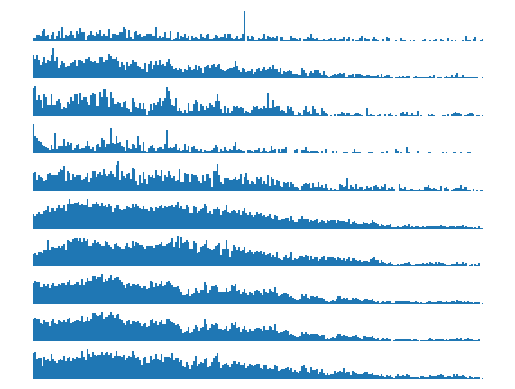

In [5]:
indices = []
fig, axes = plt.subplots(10, 1)

for i, sample in enumerate(samples[:10]):
    print(f"Analyzing sample: {sample}")
    data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

    print("Appending data...")
    new_data = []
    for d in data:
        for dd in d:
            new_data.append(dd)
    num_bins = int(len(set(new_data)) / 100)
    val = max(new_data)
    print("Plotting...")

    # plt.title(F"TF Binding Sites for {v[i]} ({sample})")
    # plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
    axes[i].hist(new_data, bins=250)
    axes[i].axis("off")

plt.show()

In [83]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("mas_type3")

info = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"mas_type3/{file}")
    if vitiligo_file.is_dir():
        sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
        sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
        sle_sum = {x[0]: float(x[1]) for x in sle_summary}
        
        vitiligo_rsids = list([l.strip() for l in open(f"mas_type3/{file}" + "/result.rsids").readlines()])
        vitiligo_summary = [l.strip().split(": ") for l in open(f"mas_type3/{file}" + "/summary.txt").readlines()[4:]]
        vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}
        
        print(F"Comparing vitiligo + SLE results for {file}")
        # Compare the # they have in common
        info.append([vitiligo_sum["Relative Risk"], sle_sum["Relative Risk"], file])
    else:
        print(f"Not there: {file}")


Comparing vitiligo + SLE results for ARID3A - hg19_0021
Comparing vitiligo + SLE results for ATF1 - hg19_0027
Not there: BATF - hg19_0042
Comparing vitiligo + SLE results for BCL3 - hg19_0050
Not there: BRD4 - hg19_0076
Comparing vitiligo + SLE results for CEBPA - hg19_0134
Not there: CTCF - hg19_0182
Comparing vitiligo + SLE results for CTCF - hg19_0190
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Comparing vitiligo + SLE results for CTCF - hg19_0233
Comparing vitiligo + SLE results for CTCF - hg19_0234
Comparing vitiligo + SLE results for CTCF - hg19_0239
Comparing vitiligo + SLE results for CTCF - hg19_0253
Comparing vitiligo + SLE results for CTCF - hg19_0254
Not there: E2F6 - hg19_0290
Comparing vitiligo + SLE results for EBNA2 - hg19_0302
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Comparing vitiligo + SLE results for ELF2 - hg19_0323
Comparing vitiligo + SLE results for EP300 - hg19_0349
Not there: EP300 - hg19_0352
Not there: EP300 - hg19_0360
Not there: 

In [80]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("mas_type3")
pbc = os.listdir("output_PBC")
ra = os.listdir("output_RA")

info = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"mas_type3/{file}")
    if vitiligo_file.is_dir():
        pbc_file = Path(f"output_PBC/{file}")
        if pbc_file.is_dir():
            sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
            sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
            sle_sum = {x[0]: float(x[1]) for x in sle_summary}
            
            vitiligo_rsids = list([l.strip() for l in open(f"mas_type3/{file}" + "/result.rsids").readlines()])
            vitiligo_summary = [l.strip().split(": ") for l in open(f"mas_type3/{file}" + "/summary.txt").readlines()[4:]]
            vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}

            pbc_rsids = list([l.strip() for l in open(f"output_PBC/{file}" + "/result.rsids").readlines()])
            pbc_summary = [l.strip().split(": ") for l in open(f"output_PBC/{file}" + "/summary.txt").readlines()[4:]]
            pbc_sum = {x[0]: float(x[1]) for x in pbc_summary}

            ra_rsids = list([l.strip() for l in open(f"output_RA/{file}" + "/result.rsids").readlines()])
            ra_summary = [l.strip().split(": ") for l in open(f"output_RA/{file}" + "/summary.txt").readlines()[4:]]
            ra_sum = {x[0]: float(x[1]) for x in ra_summary}
            
            
            print(F"Comparing vitiligo + SLE results for {file}")
            # Compare the # they have in common
            info.append([vitiligo_sum["Relative Risk"], sle_sum["Relative Risk"], pbc_sum["Relative Risk"], ra_sum["Relative Risk"], file])
    else:
        print(f"Not there: {file}")


Not there: BATF - hg19_0042
Not there: BRD4 - hg19_0076
Not there: CTCF - hg19_0182
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Not there: E2F6 - hg19_0290
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Not there: EP300 - hg19_0352
Not there: EP300 - hg19_0360
Not there: ESR1 - hg19_0386
Not there: EZH2 - hg19_0438
Comparing vitiligo + SLE results for FOS - hg19_1543
Not there: FOXH1 - hg19_0505
Not there: GABPA - hg19_0519
Not there: GATA1 - hg19_0536
Not there: GATA1 - hg19_0537
Not there: HMGN1 - hg19_0607
Not there: HOXA7 - hg19_0624
Not there: HOXC6 - hg19_0625
Not there: IRF1 - hg19_0640
Not there: IRF3 - hg19_0644
Not there: IRF3 - hg19_0645
Not there: IRF3 - hg19_0646
Not there: IRF4 - hg19_0649
Not there: JUN - hg19_0665
Not there: JUN - hg19_0666
Not there: KLF4 - hg19_0683
Not there: MAX - hg19_0714
Not there: MYC - hg19_0787
Not there: MYC - hg19_0802
Not there: NEUROG3 - hg19_0833
Not there: NFATC1 - hg19_0837
Not there: NFE2 - hg19_0838
Not there: NFY

In [84]:
info.sort(reverse=True)
info

[[15.166666666666666, 0.0, 'HSF1 - hg19_0627'],
 [9.167716084716657, 4.727892941485174, 'NFATC1 - hg19_1544'],
 [8.069530167527397, 5.16740412979351, 'FOS - hg19_1543'],
 [6.24892703862661, 5.839572192513369, 'SRF - hg19_1276'],
 [5.9536820192557895, 1.928709055876686, 'NFKB1 - hg19_1542'],
 [5.306825712392313, 5.7639155470249515, 'SP4 - hg19_1245'],
 [5.171038824763904, 4.767507496913036, 'POLR2A - hg19_1540'],
 [4.96408508000465, 1.7411219017248876, 'NFATC2 - hg19_1541'],
 [3.9487179487179493, 0.0, 'NR3C1 - hg19_0914'],
 [3.6655477570949038, 0.0, 'SUZ12 - hg19_1323'],
 [3.444794952681388, 2.5754716981132075, 'ARID3A - hg19_0021'],
 [3.1679999999999997, 1.792568273392031, 'ATF1 - hg19_0027'],
 [3.092687950566426, 0.0, 'BCL3 - hg19_0050'],
 [3.091980322617549, 1.5630855715178014, 'CTCF - hg19_0233'],
 [2.8343558282208585, 1.3512419006479481, 'RAD21 - hg19_1037'],
 [2.4957805907172994, 1.0910081743869209, 'TAL1 - hg19_1340'],
 [2.356272500692329, 2.443297033420954, 'CEBPA - hg19_0134'],

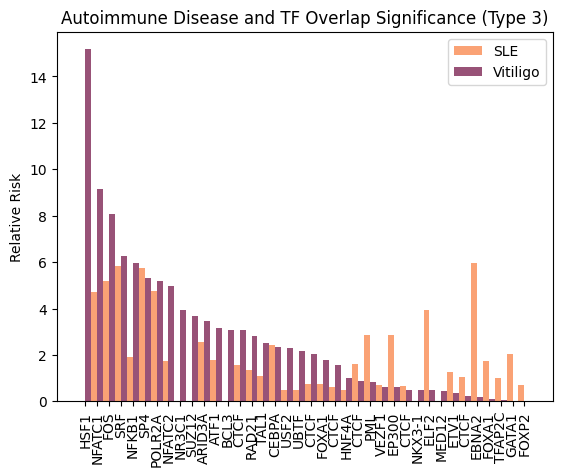

: 

In [90]:
ax = plt.subplot(111)
info = np.array(info[:-1])
vitiligo = [float(x) for x in info[:,0]]
sle = [float(x) for x in info[:,1]]
# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]

x = np.array(list(range(len(vitiligo))))
ax.set_ylabel("Relative Risk")
plt.xticks(x, [x.split(" - ")[0] for x in info[:,2]], rotation=90)
# plt.yticks([y for y in range(max(sle))])
ax.bar(x - 0.25, sle, width=0.5, color='#FAA275', align='center', label="SLE")
ax.bar(x + 0.25, vitiligo, width=0.5, color='#985277', align='center', label="Vitiligo")
# ax.bar(x + 0.05, pbc, width=0.1, color='#C33C54', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.15, ra, width=0.1, color='#FCD0A1', align='center', label="RA (Type 2)")

ax.set_title("Autoimmune Disease and TF Overlap Significance (Type 3)")
ax.legend(loc="best")
plt.savefig("relative_risk_sle_vitiligo.png")
plt.show()

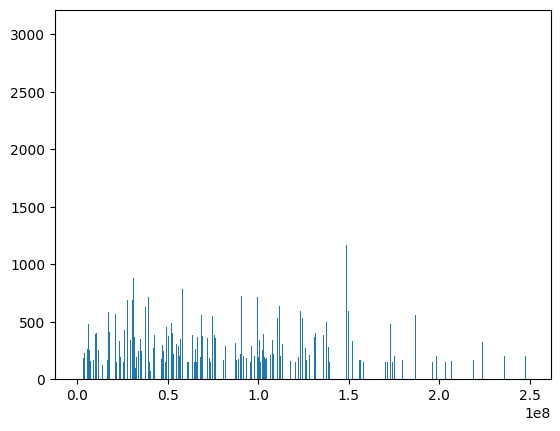

In [12]:
plt.hist(new_data, bins=num_bins)
plt.savefig(F"{sample}.png")
plt.show()

## Pt. 2: Run RELI on ALL Data
This will likely take several hours.

In [2]:
# We first load in the data we use for all the ChIP-seq files before beginning analysis.
data = LoadedData("SLE",
    "example/SLE_EU.snp",
    1000,
    "example/SLE_EU.ld",
    "sample_data/ChIPseq.index",
    given_species = "sample_data/GenomeBuild/hg19.txt")
data

Starting RELI:
	Seed: 1714010128
	SNP File: example/SLE_EU.snp


In [4]:
# Iterate over all the ChIP-seq options loaded in
# Number of threads we're going to use for processing
num_bins = 10

# Place these into 5 bins, where we will be performing multithreading
bins = []
chip_values = list(data.chip_seq_index.keys())
count = int(len(chip_values) / (num_bins - 1))
while len(chip_values) > 0:
    bins.append(chip_values[:count])
    del chip_values[:count]

bins, len(bins)

([['hg19_1540',
   'hg19_1543',
   'hg19_1544',
   'hg19_1541',
   'hg19_1542',
   'hg19_0314',
   'hg19_0343',
   'hg19_0412',
   'hg19_0514',
   'hg19_0706',
   'hg19_0775',
   'hg19_1080',
   'hg19_1177',
   'hg19_1223',
   'hg19_1484',
   'hg19_1180',
   'hg19_0808',
   'hg19_0340',
   'hg19_0101',
   'hg19_0370',
   'hg19_0417',
   'hg19_0881',
   'hg19_0811',
   'hg19_0115',
   'hg19_1371',
   'hg19_0102',
   'hg19_0103',
   'hg19_0344',
   'hg19_1485',
   'hg19_0342',
   'hg19_0407',
   'hg19_0452',
   'hg19_0773',
   'hg19_1077',
   'hg19_1081',
   'hg19_0451',
   'hg19_0809',
   'hg19_0810',
   'hg19_0425',
   'hg19_1413',
   'hg19_1057',
   'hg19_1466',
   'hg19_1467',
   'hg19_0044',
   'hg19_0311',
   'hg19_0325',
   'hg19_0337',
   'hg19_0405',
   'hg19_0512',
   'hg19_0653',
   'hg19_0697',
   'hg19_0768',
   'hg19_0836',
   'hg19_0857',
   'hg19_0866',
   'hg19_0928',
   'hg19_0952',
   'hg19_1221',
   'hg19_1314',
   'hg19_1414',
   'hg19_1478',
   'hg19_0929',
   'hg19

In [8]:
from multiprocessing import Process, Queue

# Now each of these bins will be handed off to a thread, which will deal with loading the data
def handle_bin(q, bin, thread_id):
    r = []
    for target in bin:
        print(F"Thread {thread_id} running on target {target}")
        r.append(RELI(data, target))
    q.put(r)


information = []
if __name__ == '__main__':
    print("Main line starting multithreading processes")
    threads = []
    queue_info = []
    for i, bin in enumerate(bins):
        q = Queue()
        results = [0 for _ in range(num_bins)]
        t = Process(target=handle_bin, args=[q, bin, i])
        threads.append(t)
        t.start()
    
    # Get RELI info from each thread
    for queue in queue_info:
        information.append(q.get())

    # Now join all the threads to the main thread
    for thread in threads:
        thread.join()


Main line starting multithreading processes


In [6]:
results

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]